# PISA Data Analysis (Communicate Data Findings)
## by Linda Xu 

## Table of Contents

<ul>
<li><a href="#Preliminary Wrangling">Preliminary Wrangling</a></li>
<li><a href="#Wrangling">DATA Wrangling </a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#sum">Summary</a></li>

</ul>

<a id='Preliminary Wrangling'></a>
## Preliminary Wrangling

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science
representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem
solving and 18 in an assessment of financial literacy. The assessment does not just examine whether students can reproduce what they have learned; it also examines how well they can extrapolate from what they have learned and apply that knowledge in unfamiliar settings, both in and outside of school.

Source: Pisa 2012 Survey Description

### What is/are the main feature(s) of interest in your dataset?

1. What are the general scores for maths, reading and science?

2. What is the distribution in terms of number of students in each country?

3. What is the average age of student?

4. What are the top performance's countries?

5. Are there differences in achievement based on gender?

6. Are there differences in achievement based on internet access? 

7. Would parents with different nationalities make impact on student's average score, compared with students raised in a homogenous family background?

8. What does the graph look like in terms of Country Comparison Grouped By Subject?

9. What is the correlation between three different scores? 

10. What is the average score by subject based on gender? 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr

%matplotlib inline

#display all of the columns
pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

In [2]:
#import the pisa dataset
pisa_2012 = pd.read_csv('pisa2012.csv', encoding='latin-1', low_memory = False,index_col=0)
pisa_2012.sample(5)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUDREL,ANCSUBN

In [3]:
#import the pisa columnms description
pisa_2012_dict = pd.read_csv("pisadict2012.csv", encoding='latin-1', low_memory = False,index_col=0)
pisa_2012_dict.head()

,x
CNT,Country code 3-character
SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
STRATUM,Stratum ID 7-character (cnt + region ID + orig...
OECD,OECD country
NC,National Centre 6-digit Code


In [4]:
#overview of data shape and composition
pisa_2012.shape # There are 485,490 rows and 635 columns.

(485490, 635)

In [5]:
#general information of the dataset
pisa_2012.info() # 2.3+GB, a pretty large dataset!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: float64(250), int64(17), object(368)
memory usage: 2.3+ GB


<a id='Wrangling'></a>
## DATA Wrangling 

In [6]:
#list of countries
pisa_2012['CNT'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [7]:
# Cleaning up the 'CNT' column

#'Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)' should be renamed as 'United States of America'.
pisa_2012.loc[pisa_2012['CNT']=='Florida (USA)', 'CNT'] = 'United States of America'
pisa_2012.loc[pisa_2012['CNT']=='Connecticut (USA)', 'CNT'] = 'United States of America'
pisa_2012.loc[pisa_2012['CNT']=='Massachusetts (USA)', 'CNT'] = 'United States of America'

# 'Perm(Russian Federation)' should be renamed as 'Russian Federation'.
pisa_2012.loc[pisa_2012['CNT']=='Perm(Russian Federation)', 'CNT'] = 'Russian Federation'

In [8]:
# number of unique countries
pisa_2012['CNT'].nunique()

64

In [9]:
# updated unique countreis are 64, here are the lists of them
pisa_2012['CNT'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Russian Federation', 'United States of America', 'Romania',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'Vietnam'], dtype=object)

In [10]:
#make a copy for the cleaned data
pisa_2012_clean = pisa_2012.copy()

Since it has 635 colums in the dataset, we only need certain columns to furthure explore the dataset. Therefore, we would limit the dataset in this exploration. 

In [11]:
# limit the dataset to the columns we actually need to answer our questions
pisa_2012_clean = pisa_2012_clean[['CNT', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 
                       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 
                       'PV5SCIE', 'ST26Q06','COBN_F', 'COBN_M', 'COBN_S']]

In [12]:
#check the data general information
pisa_2012_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   CNT      485490 non-null  object 
 1   ST03Q02  485490 non-null  int64  
 2   ST04Q01  485490 non-null  object 
 3   AGE      485374 non-null  float64
 4   PV1MATH  485490 non-null  float64
 5   PV2MATH  485490 non-null  float64
 6   PV3MATH  485490 non-null  float64
 7   PV4MATH  485490 non-null  float64
 8   PV5MATH  485490 non-null  float64
 9   PV1READ  485490 non-null  float64
 10  PV2READ  485490 non-null  float64
 11  PV3READ  485490 non-null  float64
 12  PV4READ  485490 non-null  float64
 13  PV5READ  485490 non-null  float64
 14  PV1SCIE  485490 non-null  float64
 15  PV2SCIE  485490 non-null  float64
 16  PV3SCIE  485490 non-null  float64
 17  PV4SCIE  485490 non-null  float64
 18  PV5SCIE  485490 non-null  float64
 19  ST26Q06  473182 non-null  object 
 20  COBN_F   481825 non-null  

Here we notice age, ST26Q06, COBN_F, COBN_M, and COBN_S have missing values. Therefore,replace the NaN values for the age of a student by the mean age in the whole dataset.

In [13]:
# Replace NaN age values with the mean age of students in the dataset
pisa_2012_clean.loc[np.isfinite(pisa_2012_clean['AGE']) == False, 'AGE'] = pisa_2012_clean['AGE'].mean()

In [14]:
# Replace NaN or 'Invalid' values for father/mother birth country and internet access to 'Missing' 
# which is already being used to represent missing information

pisa_2012_clean.loc[pisa_2012_clean['COBN_F'].isna() == True, 'COBN_F'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['COBN_M'].isna() == True, 'COBN_M'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['COBN_S'].isna() == True, 'COBN_S'] = 'Missing'

pisa_2012_clean.loc[pisa_2012_clean['COBN_F'] == 'Invalid', 'COBN_F'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['COBN_M'] == 'Invalid', 'COBN_M'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['COBN_S'] == 'Invalid', 'COBN_S'] = 'Missing'

pisa_2012_clean.loc[pisa_2012_clean['ST26Q06'].isna() == True,'ST26Q06'] = 'Missing'
pisa_2012_clean.loc[pisa_2012_clean['ST26Q06'] == 'Invalid', 'ST26Q06'] = 'Missing'


Within the dataset, we find there are 5 scores recorded for each student in terms of subjects of Math score, reading score and science score. Therefore we will sum up the 5 plausible values for each subject and divide them by 5 to get the mean. The result should be stored in a float column.

In [15]:
# compute the mean performance for each student in a specific subject and store it in a separate column
pisa_2012_clean['Mathematics'] = (pisa_2012_clean['PV1MATH'] + pisa_2012_clean['PV2MATH'] + pisa_2012_clean['PV3MATH']
                           + pisa_2012_clean['PV4MATH'] + pisa_2012_clean['PV5MATH']) / 5
pisa_2012_clean['Reading'] = (pisa_2012_clean['PV1READ'] + pisa_2012_clean['PV2READ'] + pisa_2012_clean['PV3READ']
                              + pisa_2012_clean['PV4READ'] + pisa_2012_clean['PV5READ']) / 5
pisa_2012_clean['Science'] = (pisa_2012_clean['PV1SCIE'] + pisa_2012_clean['PV2SCIE'] + pisa_2012_clean['PV3SCIE']
                              + pisa_2012_clean['PV4SCIE'] + pisa_2012_clean['PV5SCIE']) / 5
# change column types to float
pisa_2012_clean['Mathematics']=pisa_2012_clean['Mathematics'].astype(float)
pisa_2012_clean['Reading']=pisa_2012_clean['Reading'].astype(float)
pisa_2012_clean['Science']=pisa_2012_clean['Science'].astype(float)

In [16]:
# check the data information again 
pisa_2012_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CNT          485490 non-null  object 
 1   ST03Q02      485490 non-null  int64  
 2   ST04Q01      485490 non-null  object 
 3   AGE          485490 non-null  float64
 4   PV1MATH      485490 non-null  float64
 5   PV2MATH      485490 non-null  float64
 6   PV3MATH      485490 non-null  float64
 7   PV4MATH      485490 non-null  float64
 8   PV5MATH      485490 non-null  float64
 9   PV1READ      485490 non-null  float64
 10  PV2READ      485490 non-null  float64
 11  PV3READ      485490 non-null  float64
 12  PV4READ      485490 non-null  float64
 13  PV5READ      485490 non-null  float64
 14  PV1SCIE      485490 non-null  float64
 15  PV2SCIE      485490 non-null  float64
 16  PV3SCIE      485490 non-null  float64
 17  PV4SCIE      485490 non-null  float64
 18  PV5SCIE      485490 non-

We found no missing values and math, reading and science columns have changed to float.

In [17]:
# Drop any further-unnecessary columns

pisa_2012_clean.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

In [18]:
# Rename columns appropriately

pisa_2012_clean.rename({'CNT' : 'Country', 'ST03Q02' : 'Birth year', 'ST04Q01' : 'Gender', 'AGE' : 'Age', 'COBN_F' : 'Birth Country Father', 
           'COBN_M' : 'Birth Country Mother', 'COBN_S' : 'Birth Country Child','ST26Q06' : 'Internet Access'}, axis = 'columns', inplace = True)

We want to find out whether a student come from a family where parents have same nationality or different nationalities. Therefore, we need to create a new variable based on our need. 

In [19]:
pisa_2012_clean['Parents - Same Cultural Background'] = (pisa_2012_clean['Birth Country Father'] == pisa_2012_clean['Birth Country Mother'])
pisa_2012_clean.loc[pisa_2012_clean['Parents - Same Cultural Background'] == True, 'Parents - Same Cultural Background'] = 'Same'
pisa_2012_clean.loc[pisa_2012_clean['Parents - Same Cultural Background'] == False, 'Parents - Same Cultural Background'] = 'Different'

Here is the final dataselt looks like:

In [20]:
pisa_2012_clean.head()

,Country,Birth year,Gender,Age,Internet Access,Birth Country Father,Birth Country Mother,Birth Country Child,Mathematics,Reading,Science,Parents - Same Cultural Background
1,Albania,1996,Female,16.17,No,Albania,Albania,Albania,366.18634,261.01424,371.91348,Same
2,Albania,1996,Female,16.17,Yes,Albania,Albania,Albania,470.56396,384.68832,478.12382,Same
3,Albania,1996,Female,15.58,Yes,Albania,Albania,Albania,505.53824,405.18154,486.60946,Same
4,Albania,1996,Female,15.67,Yes,Albania,Albania,Albania,449.45476,477.46376,453.97240,Same
5,Albania,1996,Female,15.50,Yes,Albania,Albania,Albania,385.50398,256.01010,367.15778,Same


In [21]:
#total 485490 students with 12 varaibles
pisa_2012_clean.shape

(485490, 12)

### What is the structure of your dataset?

There are 485,490 students covered in the dataset with 635 features. 64 countries are represented. Some interesting features include attributes such as country, gender, parents' academic qualifications and the family wealth. The features are a mix of either categorical/ordinal in nature (such as parents' educational qualifications), or numeric in nature (such as maths, reading and science scores).

### What is/are the main feature(s) of interest in your dataset?

1. What are the general scores for maths, reading and science?

2. What are the top performance's countries?

3. Are there differences in achievement based on gender?

4. Are there differences in achievement based on internet access? 

5. Would parents with different nationalities make impact on student's average score, compared with students raised in a homogenous family background?

6. What does the graph look like in terms of Country Comparison Grouped By Subject?

7. What is the correlation between three different scores 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe there must be some average score differences for students from different countries; scores on math, science, and reading might be different based on gender difference. In addition, I believe parents' different nationalities could make impact on student's average score, and availability of internet could also make impact on the student's performance as well.

<a id='univariate'></a>
## Univariate Exploration

First we want to see the distribution of scores for math, science and reading across students. Then we will visualize the top average scores by countries, score comparison by gender, socre comparison by internet accessibility, and score comparison by parents cultural difference. 

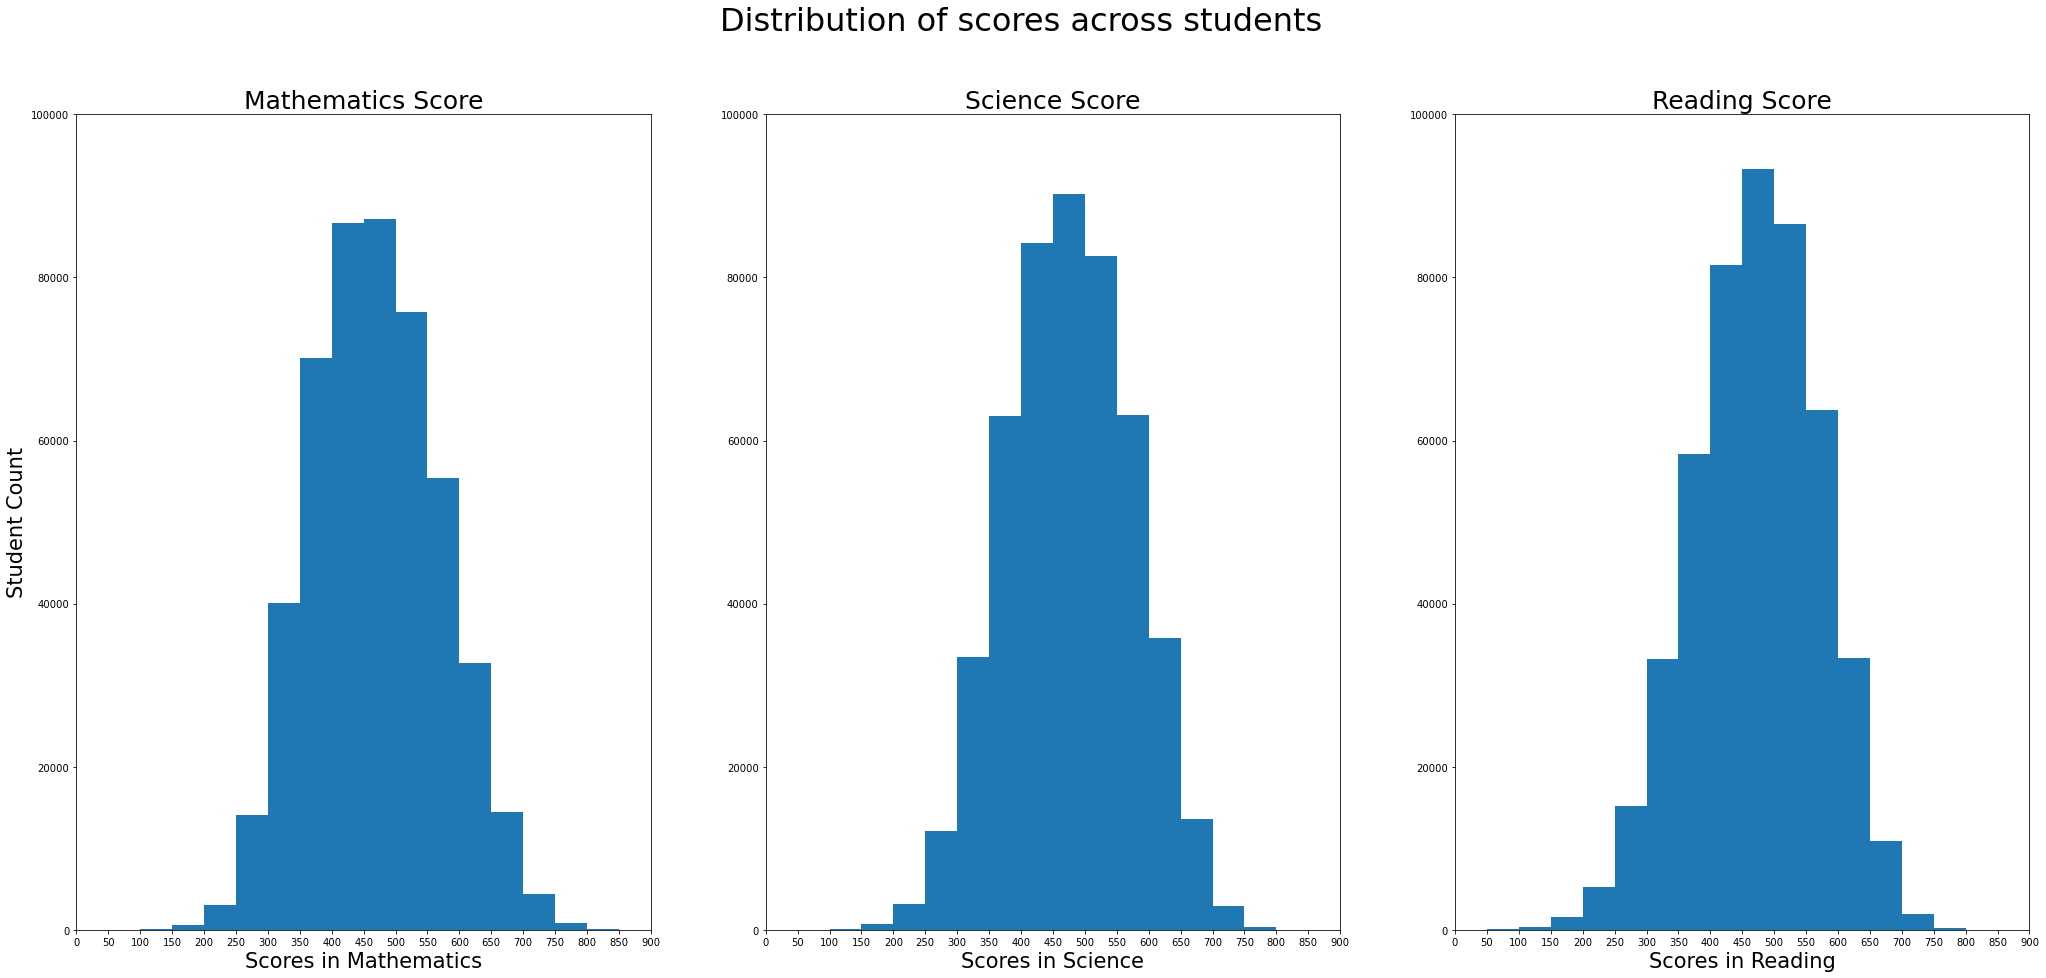

In [22]:
plt.figure(figsize = [35, 15])

bins_hist = np.arange(0, 900 + 1, 50)

# subplot 1/3
plt.subplot(1, 3, 1)
plt.hist(pisa_2012_clean['Mathematics'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Mathematics',fontsize=21);
plt.ylabel('Student Count',fontsize=21)
plt.title("Mathematics Score", fontsize=25);

# subplot 2/3
plt.subplot(1, 3, 2)
plt.hist(pisa_2012_clean['Science'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Science',fontsize=21);
plt.title("Science Score", fontsize=25);

# subplot 3/3
plt.subplot(1, 3, 3)
plt.hist(pisa_2012_clean['Reading'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Reading',fontsize=21);
plt.title("Reading Score", fontsize=25);
# set the overall title
plt.suptitle('Distribution of scores across students', fontsize=32)
# save the output as png for further use
plt.savefig('univariate_barplot_subjectscores.png')
plt.show()

We see the following things:
1. The math score looks normally distributed, with the mean of about 470, and an overall range of slightly below 200 to slightly above 800.
2. The science score looks normally distributed with a very slight left skew. The mean is around 470, and an overall range of about 100 to about 800. There does not look to be any significant outliers/spikes.
3. The reading score looks normally distributed with a very slight left skew. The mean is around 470, and an overall range of about 50 to about 800. There does not look to be any significant outliers/spikes.
4. All distributions are unimodal
5. The major part of the students gets a score between 300 and 600

In [23]:
# get the overall mean score for each country and drop the individual subject columns
df_country = pisa_2012_clean.groupby(['Country'])[['Mathematics','Science','Reading']].mean().reset_index()
df_country['Average Performance'] = (df_country['Mathematics'] 
                          + df_country['Science'] 
                          + df_country['Reading']) / 3
df_country.drop(columns = ['Mathematics','Science','Reading'], inplace = True)

In [24]:
# get top performing countries
df_top10_countries = df_country.sort_values('Average Performance').tail(10)
df_top10_countries

,Country,Average Performance
36,Macao-China,522.702057
44,Poland,523.177114
16,Estonia,527.930247
33,Liechtenstein,528.253616
10,Chinese Taipei,534.284806
28,Japan,540.020395
31,Korea,542.463084
50,Singapore,551.037344
21,Hong Kong-China,553.520097
9,China-Shanghai,586.541569


Based on the top performing countries, 7 out of 10 are from Asian, the other 3 countries are European countries. Students from China-Shanghai has the highest score among other countries, then students from Hong kong as the second, and students from Singapore as the third. Consequently, the data could be biased towards the top three countries.

<ipython-input-32-5e813974a460>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(Country_data["index"])


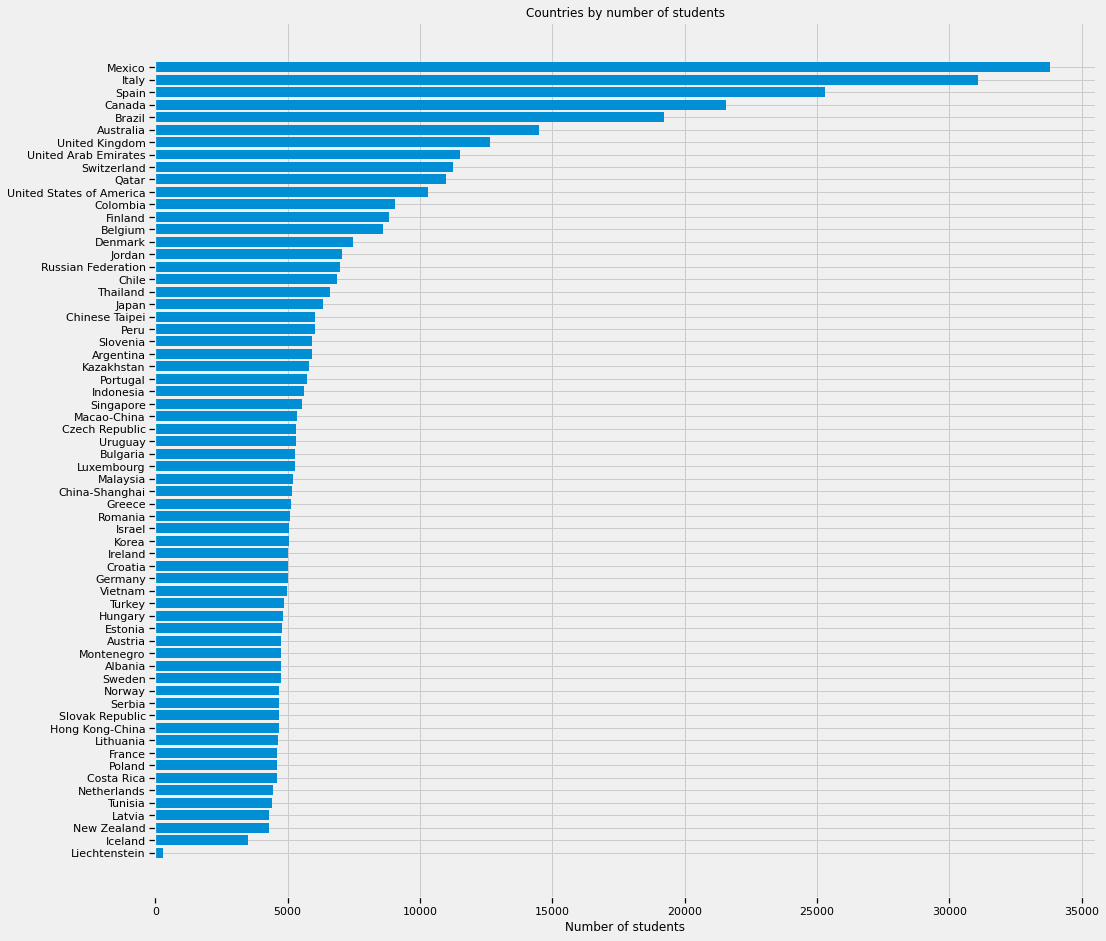

In [32]:
# Use bar chart to plot number of students per country
Country_data = pisa_2012_clean.Country.value_counts().reset_index()
fig, ax = plt.subplots(figsize = [15,15])
ax.barh(Country_data["index"], Country_data.Country)
ax.set_yticklabels(Country_data["index"])
ax.invert_yaxis()
ax.set_xlabel("Number of students")
ax.set_title("Countries by number of students");

Most countries have between 5000 to 10000 students to take the survey. The countplot also shows that there are a few countries which are not bounded these limits. For example, Mexico and Italy have over 30,000 students and Liechtenstein has well below 1000 student who participate the survey. 

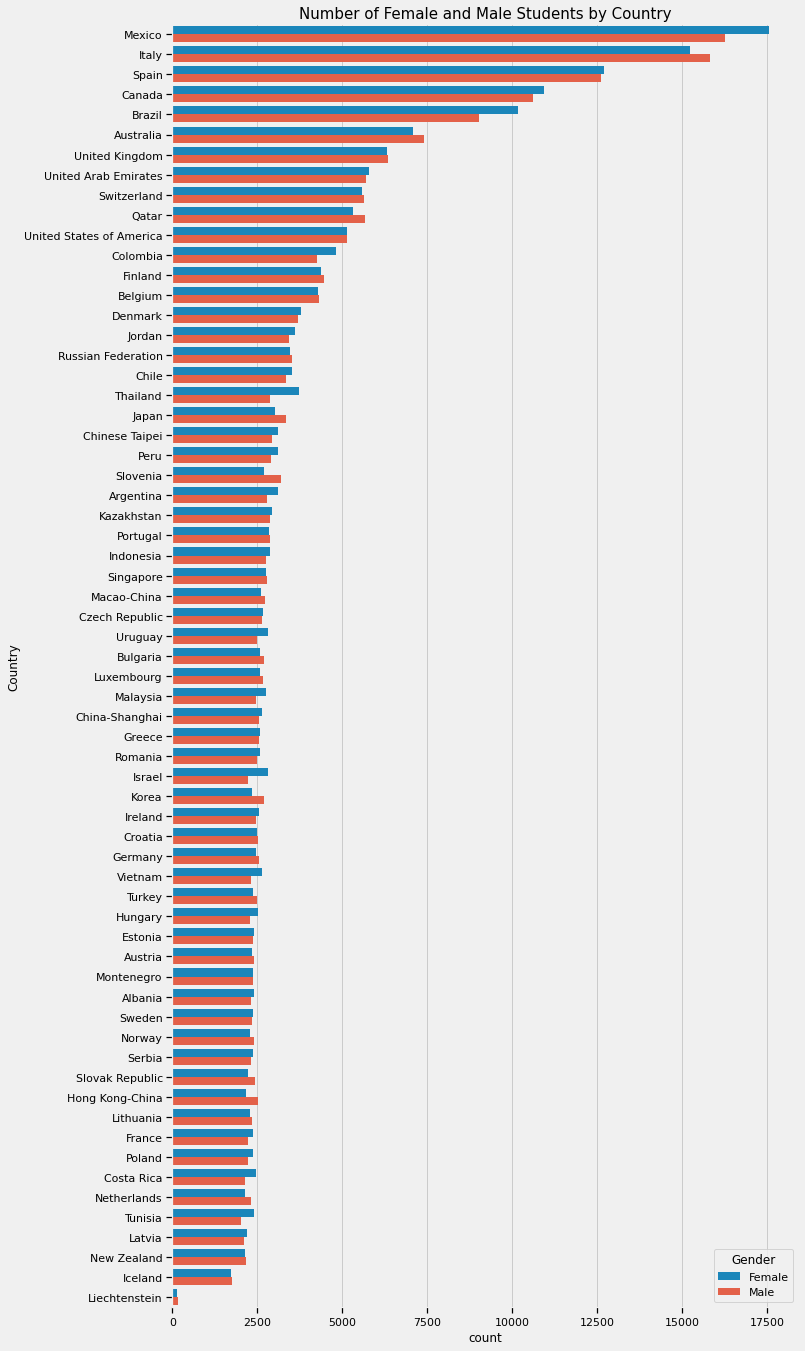

In [31]:
plt.style.use('fivethirtyeight')
sb.set_context("notebook")

order= pisa_2012_clean['Country'].value_counts().index

plt.figure(figsize=[10,22])
sb.countplot(data=pisa_2012_clean, y='Country', order=order, hue='Gender')
plt.title('Number of Female and Male Students by Country',size=15);


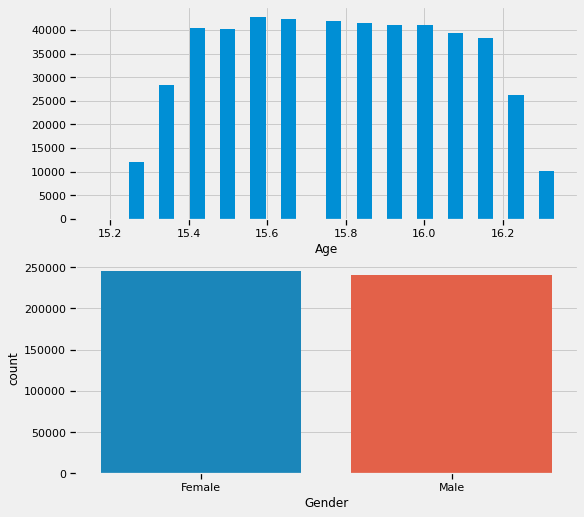

In [34]:
# Plot age histogram and gender bar chart
fig, ax = plt.subplots(2,1, figsize = [8,8])
ax[0].hist(data = pisa_2012_clean, x = "Age", bins=30)
ax[0].set_xlabel("Age")
sb.countplot(data = pisa_2012_clean, x = "Gender", ax = ax[1])
ax[1].set_xlabel("Gender")
plt.show()

The vast majority of students are between 15 and 16 years old. In the range between 15.4 and 16.1, the distribution resembles a uniform shape. In addtion to that, the gender ratio seems to be balanced out well. There are nearly 15000 students for each biological gender.

<a id='bivariate'></a>
## Bivariate Exporation 


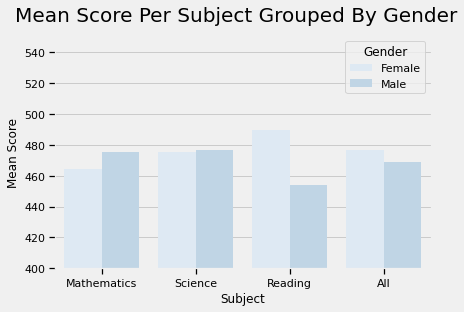

In [35]:

# compute the mean scores and an overall mean
gender_compare = pisa_2012_clean.groupby(['Gender'])[['Mathematics','Science','Reading']].mean().reset_index()
gender_compare['All'] = (gender_compare['Mathematics'] 
                          + gender_compare['Science'] 
                          + gender_compare['Reading']) / 3
# initiate the output dataframe
cols = ['Gender','Subject','Mean Score']
df_gender = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in gender_compare.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_gender = df_gender.append({'Gender': row['Gender'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sb.barplot(x="Subject",y="Mean Score",hue="Gender",data=df_gender, palette=sb.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Gender', fontsize=20)
plt.ylim(400, 550 + 1);
# save the output as png for further use
plt.savefig('univariate_boxplot_gendercomparison.png')
plt.show()

From the graph above, we could see male students have a slightly higher score on math, while female students have much higher score than male students in terms of reading. For science score, female and male students performe almost the same. In general, the average score of female students are slightly higher than male students.

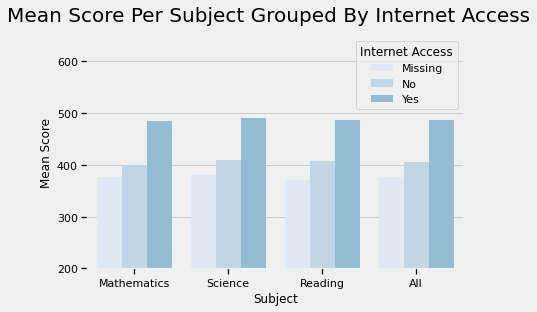

In [36]:
# compute the mean scores and an overall mean
internet_comparison = pisa_2012_clean.groupby(['Internet Access'])[['Mathematics','Science','Reading']].mean().reset_index()
internet_comparison['All'] = (internet_comparison['Mathematics'] 
                          + internet_comparison['Science'] 
                          + internet_comparison['Reading']) / 3
# initiate the output dataframe
cols = ['Internet Access','Subject','Mean Score']
df_internet_access = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in internet_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_internet_access = df_internet_access.append({'Internet Access': row['Internet Access'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sb.barplot(x="Subject",y="Mean Score",hue="Internet Access",data=df_internet_access, palette=sb.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Internet Access', fontsize=20)
plt.ylim(200, 650 + 1);
# save the output as png for further use
plt.savefig('univariate_boxplot_internetaccesscomparison.png')
plt.show()

From the above graph, we found having the accessibility of internet would have a positive impact on student's score even though we have missing data. Therefore, we would recommend student to study in the environment with internet access. 

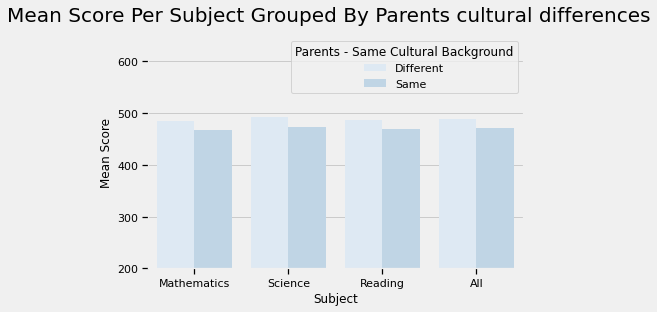

In [37]:
# compute the mean scores and an overall mean
culture_comparison = pisa_2012_clean.groupby(['Parents - Same Cultural Background'])[['Mathematics','Science','Reading']].mean().reset_index()
culture_comparison['All'] = (culture_comparison['Mathematics'] 
                          + culture_comparison['Science'] 
                          + culture_comparison['Reading']) / 3
# initiate the output dataframe
cols = ['Parents - Same Cultural Background','Subject','Mean Score']
df_culture = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in culture_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_culture = df_culture.append({'Parents - Same Cultural Background': row['Parents - Same Cultural Background'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sb.barplot(x="Subject",y="Mean Score",hue="Parents - Same Cultural Background",data=df_culture, palette=sb.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Parents cultural differences', fontsize=20)
plt.ylim(200, 650 + 1);
# save the output as png for further use
plt.savefig('univariate_boxplot_internetaccesscomparison.png')
plt.show()

From the graph above, we found students with parents from different nationalities has a little bit higher score compare to students with parents from same nationalities(country). I am assuming that parents with different cultural background would furthure inspire their children to focus on their studies. However, there's onle a small gap between the two groups, and apprently we have much more sample size of parents with same nationality. Therefore, we need further evidence to support my assumption. 

In this part, we want to focus on the performance of different countires. Let's visualize the three subjects score by countries and the average score by countries as well. All of the boxes need to be sorted descending.  

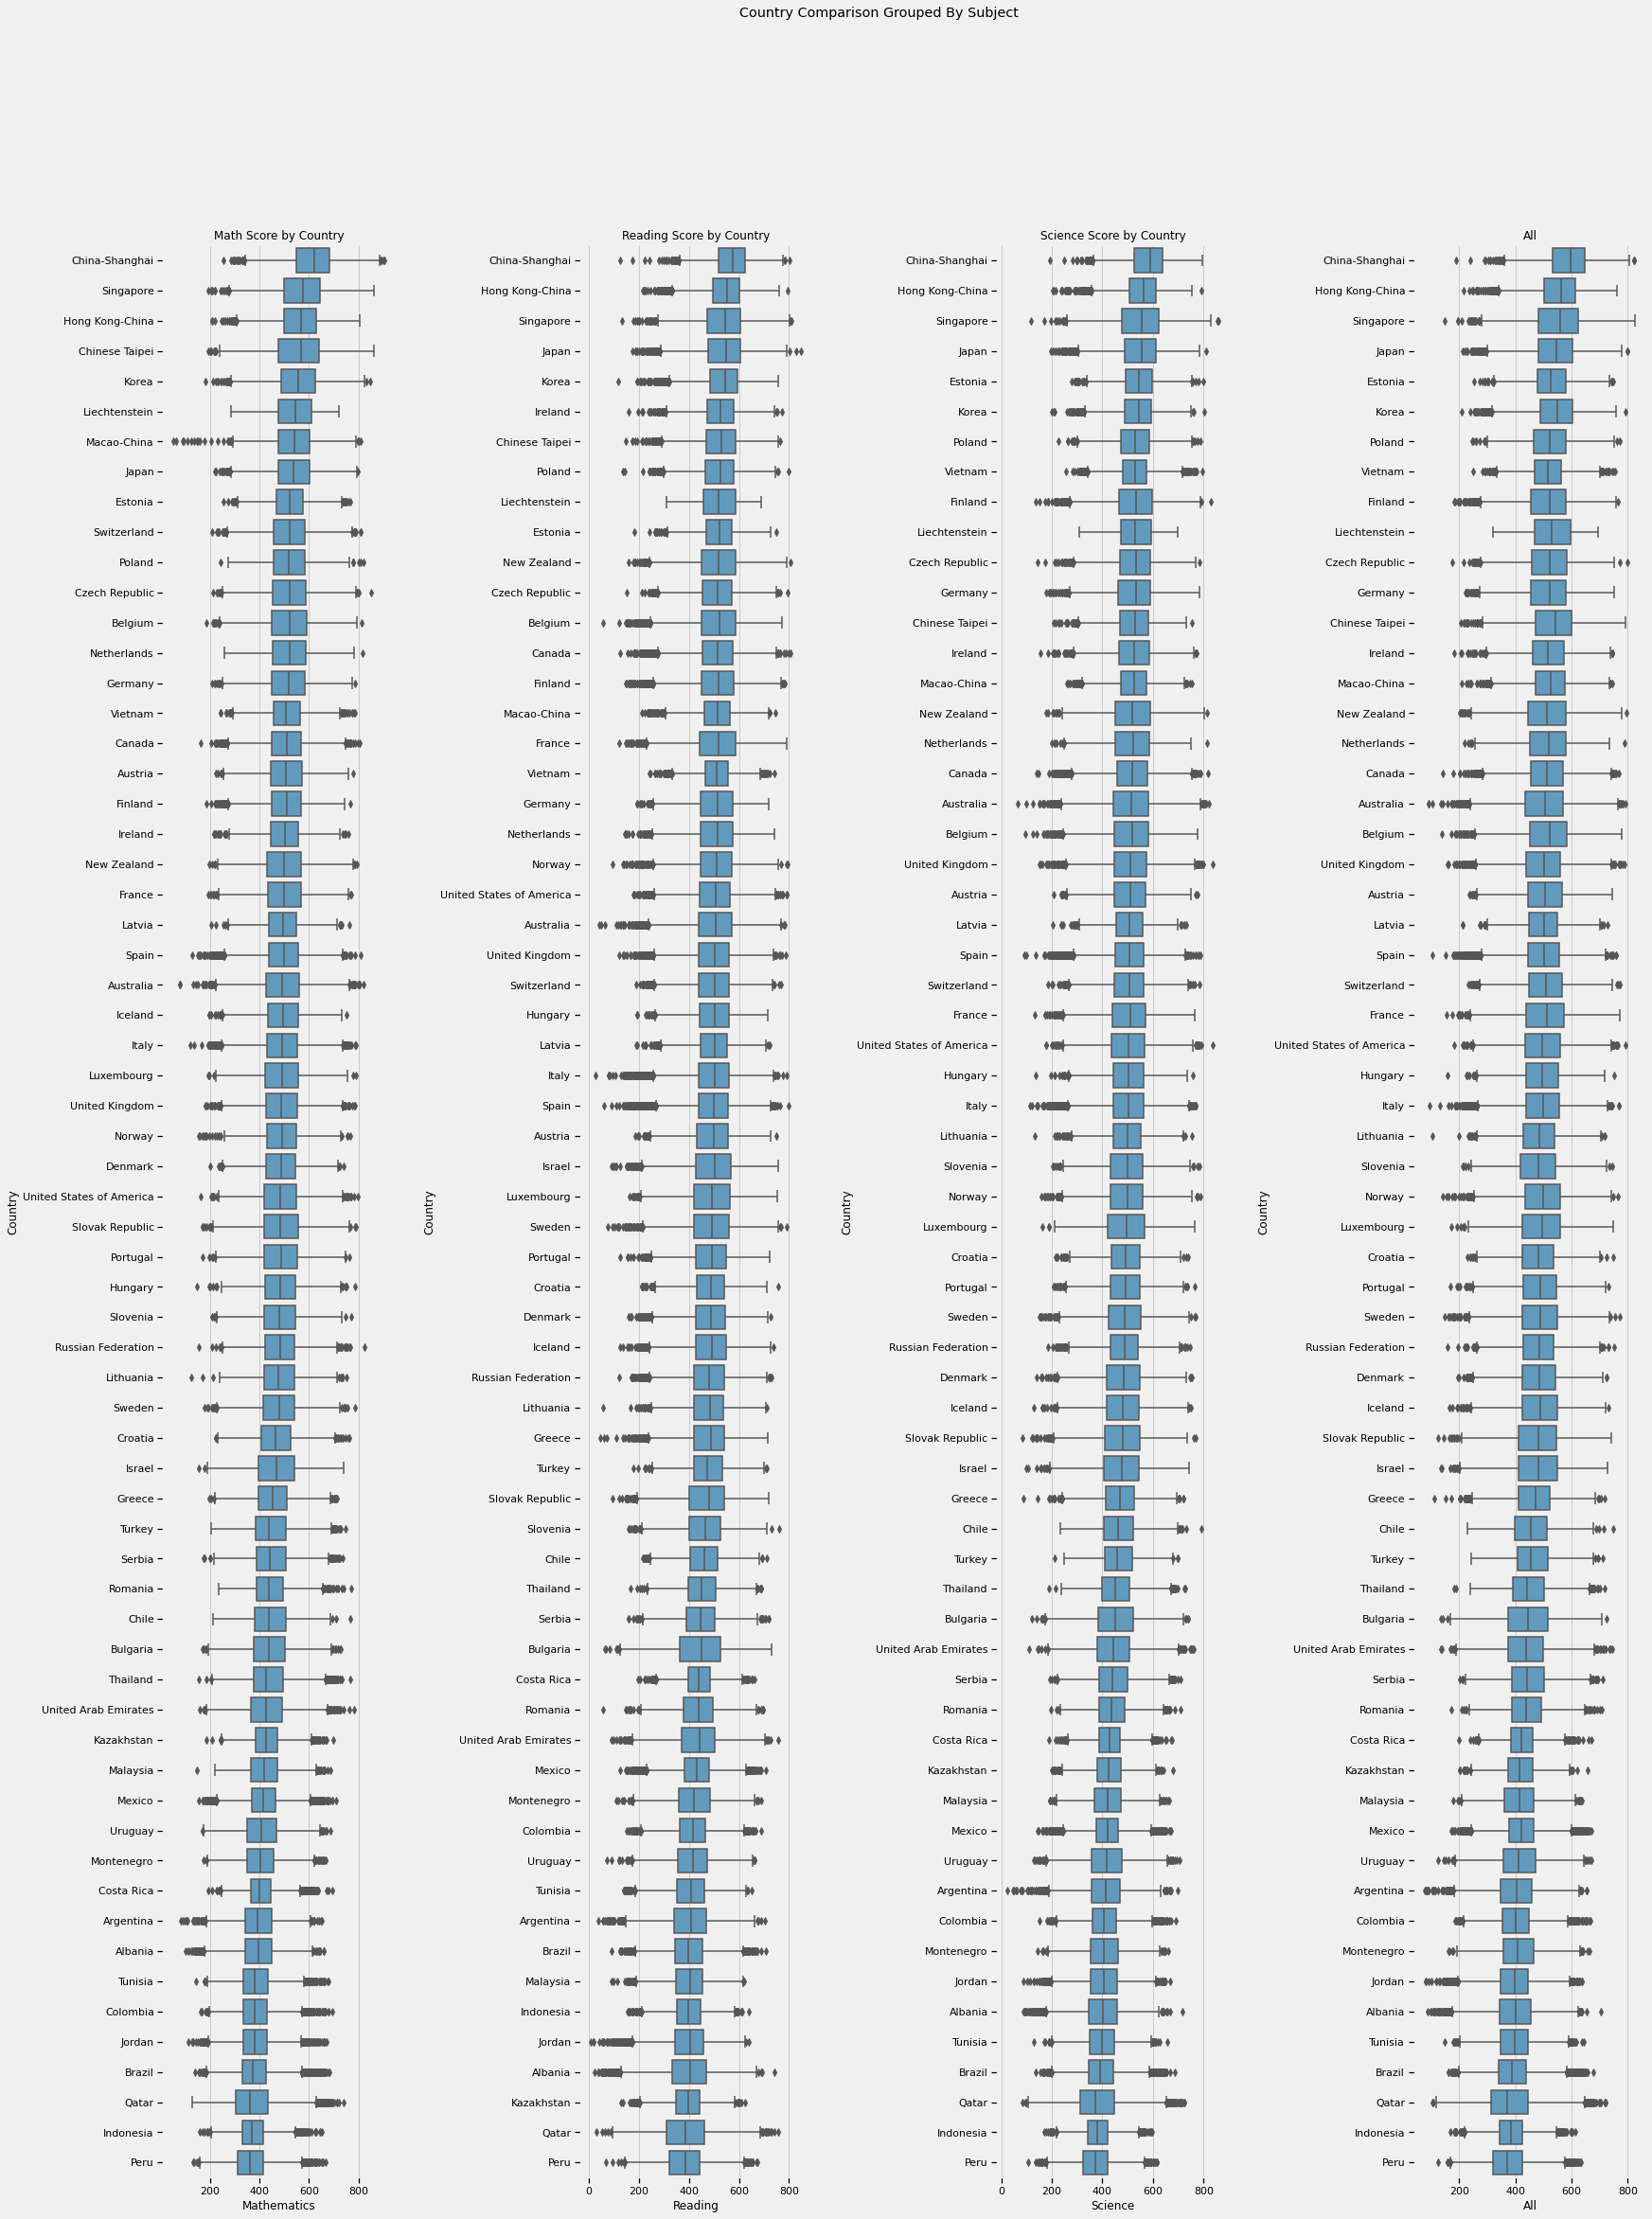

In [38]:
# set up the figure
plt.figure(figsize = [25, 35])
plt.subplots_adjust(wspace = 0.80) # adjust spacing between subplots, in order to show long country names nicely

pisa_2012_clean['All'] = (pisa_2012_clean['Mathematics'] 
                          + pisa_2012_clean['Science'] 
                          + pisa_2012_clean['Reading']) / 3

# set the orders descending
math_order = pisa_2012_clean.groupby('Country')['Mathematics'].mean().sort_values(ascending = False).index
reading_order = pisa_2012_clean.groupby('Country')['Reading'].mean().sort_values(ascending = False).index
science_order = pisa_2012_clean.groupby('Country')['Science'].mean().sort_values(ascending = False).index
all_order = pisa_2012_clean.groupby('Country')['All'].mean().sort_values(ascending = False).index

# subplot 1/4
plt.subplot(1, 4, 1)
sb.boxplot(x = pisa_2012_clean['Mathematics'], y = pisa_2012_clean['Country'], 
            order = math_order, color=sb.color_palette("Blues")[3]);
plt.ylabel('Country')
plt.title('Math Score by Country');

#subplot 2/4
plt.subplot(1, 4, 2)
sb.boxplot(x = pisa_2012_clean['Reading'], y = pisa_2012_clean['Country'], 
            order = reading_order, color=sb.color_palette("Blues")[3]);
plt.title('Reading Score by Country');

# subplot 3/4
plt.subplot(1, 4, 3)
sb.boxplot(x = pisa_2012_clean['Science'], y = pisa_2012_clean['Country'], 
            order = science_order, color=sb.color_palette("Blues")[3]);
plt.title('Science Score by Country');

# subplot 4/4
plt.subplot(1, 4, 4)
sb.boxplot(x = pisa_2012_clean['All'], y = pisa_2012_clean['Country'], 
            order = science_order, color=sb.color_palette("Blues")[3]);
plt.title('All');

# set the overall title
plt.suptitle('Country Comparison Grouped By Subject');
# save the output as png for further use
plt.savefig('bivariate_boxplot_countrycomparison.png')
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The top three regions are China-Shanghai, Singapore, and China-Hongkong. And the top 7 reginons are from Asian. In terms of the individual subject scores, the rankings are differenct compare to the average score. The opposite is the case for Peru that ranks last in all of the categories.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The box plot allows us to see the outliers in scores for each country in part. Each country has outliers either on the left side or right side. But from their perspectives winthin their countries, they would not treat the scores or students as outliers since every student works hard on improving their scores. 

<a id='multi'></a>
## Multivariate Exploration

We choose pairplot to visualize the correlations between different subjects

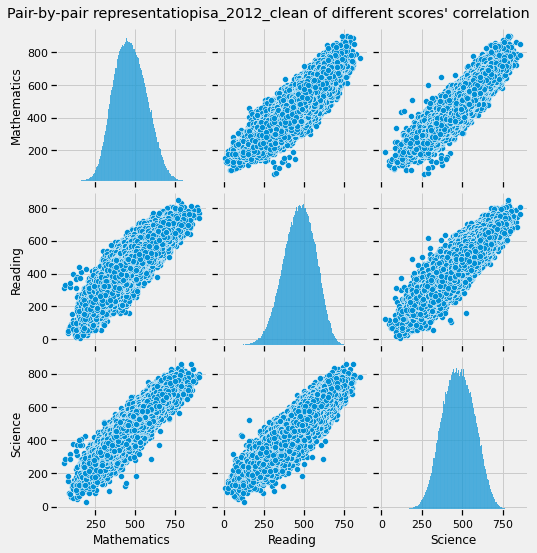

In [39]:
grid = sb.pairplot(data = pisa_2012_clean, vars=["Mathematics", "Reading", "Science"]);
grid.fig.suptitle("Pair-by-pair representatiopisa_2012_clean of different scores' correlation", y = 1.02);

In general, the mean scores for maths, reading and science are all positively correlated strongly with one another. This means that a student who is good at maths will usually be strong in science and reading as well, and vice versa. The strongest correlation between the subjects in Mathematics and Science does not seem very surprising. 

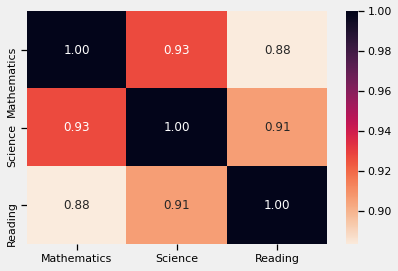

In [41]:
# Let us find the correlation between the three quantitative variables using a heatmap.
corr_vars= pisa_2012_clean[['Mathematics','Science','Reading']].corr()
sb.heatmap(corr_vars, annot = True, fmt = '.2f', cmap = 'rocket_r');


The Avg Math Score, Avg Science Score and Avg Reading Score variables have a high positive correlation between each other.

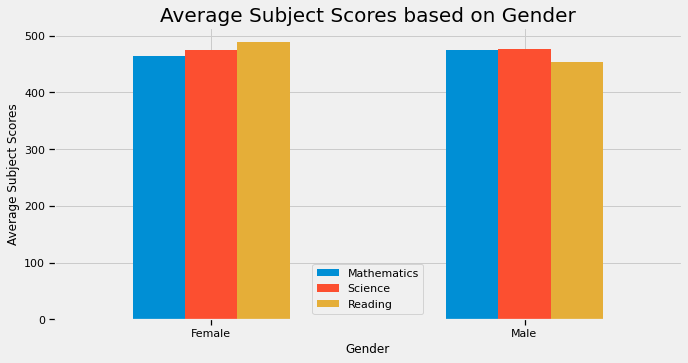

In [42]:
# Here we plot the three quantitative variables of average subject scores vs a categorical gender variable.
plt.rcParams['figure.figsize'] = [10, 5]
Gender_Scores= pisa_2012_clean.groupby(['Gender']).mean()[['Mathematics','Science','Reading']]
Gender_Scores.plot(kind='bar');
plt.xlabel('Gender', fontsize= 12)
plt.ylabel('Average Subject Scores',fontsize= 12)
plt.title('Average Subject Scores based on Gender',fontsize= 20)
plt.xticks(rotation=0)
plt.legend(loc='best');

Girls score their highest in Reading followed by Science and Math.Boys seem to score their highest in both Science and Math while their least scores are in Reading. In general, there are not too many score differences.

<AxesSubplot:xlabel='Science', ylabel='Mathematics'>

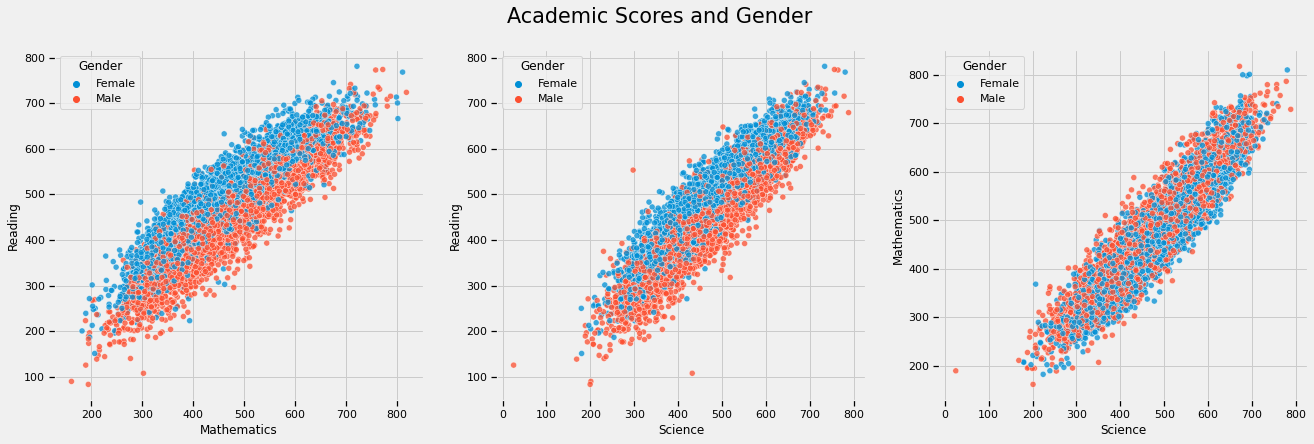

In [45]:
# Plot matrix: sample 10000 students so that plots render faster
samples = np.random.choice(pisa_2012_clean.shape[0], 10000, replace=False)
sam_student = pisa_2012_clean.loc[samples, :]
fig = plt.figure(figsize=[20, 6])
plt.suptitle('Academic Scores and Gender', size='xx-large')

plt.subplot(1, 3, 1)
sb.scatterplot(data=sam_student,
               x='Mathematics',
               y='Reading',
               hue='Gender',
               alpha=0.75)

plt.subplot(1, 3, 2)
sb.scatterplot(data=sam_student,
               x='Science',
               y='Reading',
               hue='Gender',
               alpha=0.75)

plt.subplot(1, 3, 3)
sb.scatterplot(data=sam_student,
               x='Science',
               y='Mathematics',
               hue='Gender',
               alpha=0.75)

We looked deeper at relationships that had been found previously. We confirmed that male students prefer math and science, and female students prefer reading.

<a id='sum'></a>
## Summary


Let's restate our four questions of interest, along with a summary of our conclusions:

1. What are the general scores for maths, reading and science?

All three scores looks normally distributed, with the mean of about 470. Here does not look to be any significant outliers/spikes, and all distributions are unimodal. The major part of the students gets a score between 300 and 600 in any subject.

2. What is the distribution in terms of number of students in each country?

Most countries have between 5000 to 10000 students to take the survey. The countplot also shows that there are a few countries which are not bounded these limits. For example, Mexico and Italy have over 30,000 students and Liechtenstein has well below 1000 student who participate the survey. 

3. What is the average age of student?

The vast majority of students are between 15 and 16 years old. In the range between 15.4 and 16.1, the distribution resembles a uniform shape. In addtion to that, the gender ratio seems to be balanced out well. There are nearly 15000 students for each biological gender.

4. What are the top performance's countries?

7 out of 10 are from Asian, the other 3 countries are European countries. Students from China-Shanghai has the highest score among other countries, then students from Hong kong as the second, and students from Singapore as the third. 

5. Are there differences in achievement based on gender or country?

In terms of country section, 7 out of 10 are from Asian, the other 3 countries are European countries. Students from China-Shanghai has the highest score among other countries, then students from Hong kong as the second, and students from Singapore as the third. In terms of gender comparison, male students have a slightly higher score on math, while female students have much higher score than male students in terms of reading. For science score, female and male students performe almost the same. In general, the average score of female students are slightly higher than male students.

6. Are there differences in achievement based on internet access?

We found having the accessibility of internet would have a positive impact on student's score even though we have missing data. Therefore, we would recommend student to study in the environment with internet access.

7. Would parents with different nationalities make impact on student's average score, compared with students raised in a homogenous family background?

We found students with parents from different nationalities has a little bit higher score compare to students with parents from same nationalities(country). I am assuming that parents with different cultural background would furthure inspire their children to focus on their studies. However, there's onle a small gap between the two groups, and apprently we have much more sample size of parents with same nationality. Therefore, we need further evidence to support my assumption.


8. What does the graph look like in terms of Country Comparison Grouped By Subject?

The top three regions are China-Shanghai, Singapore, and China-Hongkong. And the top 7 reginons are from Asian. In terms of the individual subject scores, the rankings are differenct compare to the average score. The opposite is the case for Peru that ranks last in all of the categories.

9. What is the correlation between three different scores

In general, the mean scores for maths, reading and science are all positively correlated strongly with one another. This means that a student who is good at maths will usually be strong in science and reading as well, and vice versa. The strongest correlation between the subjects in Mathematics and Science does not seem very surprising.
 
10. What is the average score by subject based on gender? 
Girls score their highest in Reading followed by Science and Math.Boys seem to score their highest in both Science and Math while their least scores are in Reading. In general, there are not too many score differences.